# Compare the results of using climatological data with those using year-specific data

Our ocean models do not all have data up to date with the observations. \
Therefore we may need to use climatological estimates for modelling more recent years. \
Here we investigate how it will affect our model if we use climatological O2 flux estimates, compared with using the year specific estimates.

In [1]:
import os, glob
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil.relativedelta import relativedelta

from acrg.name import name
from acrg.convert import concentration

import apo_emiss_func, apo_funcs, apo_plot_info

/user/home/vf20487/.conda/envs/acrg/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Inputs

In [2]:
# manual inputs
year = 2015
months = [8, 12]
site = 'WAO'
species = 'o2'
resolution = ['day', 'mth']

# automated inputs
ls = {'year': '-', 'climatology': '--'}
colors = {'co2_nemo': 'darkorange', 'n2_nemo': 'forestgreen', 'o2_nemo': 'dodgerblue', 'o2_ecco': 'navy', 'o2_jena': 'purple'}

species = ['co2', 'n2', 'o2'] if species=='all' else [species]
resolution = {res: res_name for res, res_name in {'day': 'daily', 'mth': 'monthly'}.items() if res in resolution}

time_diff = relativedelta(years=1, hours=-1) if months is None else relativedelta(months=1)
starts = datetime(year, 1, 1) if months is None else {month: datetime(year, month, 1) for month in months}
end = {month:start + time_diff for month, start in starts.items()}

## Get the input data

In [35]:
ts_data_all['climatology'][8]

<xarray.Dataset>
Dimensions:             (time: 745)
Coordinates:
  * time                (time) datetime64[ns] 2015-08-01 ... 2015-09-01
Data variables:
    co2_ocean_nemo_mth  (time) float32 -0.2643 -0.2546 ... -0.8007 -0.7611
    co2_ocean_ecco_day  (time) float32 1.491 1.462 1.314 ... 3.469 2.887 2.199
    o2_ocean_ecco_day   (time) float64 0.5857 0.5764 0.5667 ... 0.6496 0.6881
    co2_ocean_jena_day  (time) float64 -0.000732 -0.0006512 ... -0.003087
    o2_ocean_jena_day   (time) float64 0.3253 0.3142 0.3038 ... 0.7394 0.6706
    o2_ocean_nemo_day   (time) float32 1.405 1.372 1.291 ... 1.623 1.441 1.303
    n2_ocean_nemo_day   (time) float32 0.5344 0.5263 0.5053 ... 0.2361 0.2845
    co2_ocean_ecco_mth  (time) float32 1.075 1.048 0.899 ... 3.385 2.717 3.522
    o2_ocean_ecco_mth   (time) float64 0.7893 0.7778 0.7649 ... 1.476 0.8855
    o2_ocean_nemo_mth   (time) float32 0.9485 0.943 0.8946 ... 2.227 0.5937
    n2_ocean_nemo_mth   (time) float32 0.2506 0.2496 0.2483 ... 0.6135 -0.1328

In [36]:
ts_data_all = {data_type: apo_funcs.get_timeseries(sites=[site],
                                                   year=year,
                                                   sources=['ocean'],
                                                   climatology=clim,
                                                   drop_monthly=False)[site]
               for data_type, clim in {'year': False, 'climatology': True}.items()}

ts_data_all['climatology']['co2_ocean_ecco_day'] = ts_data_all['climatology']['co2_ocean_ecco_day']/10 

ts_data_all = {data_type: {month: ts_type.sel(time=slice(start, end[month]))
                           for month, start in starts.items()}
               for data_type, ts_type in ts_data_all.items()}

clim_str = {'year': '', 'climatology': ', climatology'}

labels = {res: {data_type: {species: f'{apo_plot_info.model_names[species.split("_")[2]]}{clim_str[data_type]}'
                            for species in ts_type[months[0]].data_vars if res in species and species[:2]=='o2'}
                for data_type, ts_type in ts_data_all.items()}
          for res in resolution}

Finding timeseries for WAO
ocean: ['/user/work/vf20487/Timeseries/o2_co2/WAO_ocean_timeseries_2015.nc']

Data variables: 
['co2_ocean_nemo_mth', 'co2_ocean_ecco_day', 'o2_ocean_ecco_day', 'co2_ocean_jena_day', 'o2_ocean_jena_day', 'o2_ocean_nemo_day', 'n2_ocean_nemo_day', 'co2_ocean_ecco_mth', 'o2_ocean_ecco_mth', 'o2_ocean_nemo_mth']
---------------------------

Finding timeseries for WAO
ocean: ['/user/work/vf20487/Timeseries/o2_co2/WAO_ocean_timeseries_climatology_2015.nc']

Dropping variables: 
['co2_ocean_ecco_day_uncertainty', 'o2_ocean_ecco_day_uncertainty', 'co2_ocean_ecco_mth_uncertainty', 'o2_ocean_ecco_mth_uncertainty', 'co2_ocean_nemo_mth_uncertainty', 'o2_ocean_nemo_mth_uncertainty', 'n2_ocean_nemo_mth_uncertainty']

Data variables: 
['co2_ocean_nemo_mth', 'co2_ocean_ecco_day', 'o2_ocean_ecco_day', 'co2_ocean_jena_day', 'o2_ocean_jena_day', 'o2_ocean_nemo_day', 'n2_ocean_nemo_day', 'co2_ocean_ecco_mth', 'o2_ocean_ecco_mth', 'o2_ocean_nemo_mth', 'n2_ocean_nemo_mth']
-------

## Plot the timeseries

We plot the timeseries of the ocean contribution to the mf at the site

Saving to /user/work/vf20487/Figures/Timeseries/Ocean/WAO_O2_ocean_timeseries_201508-201512.png


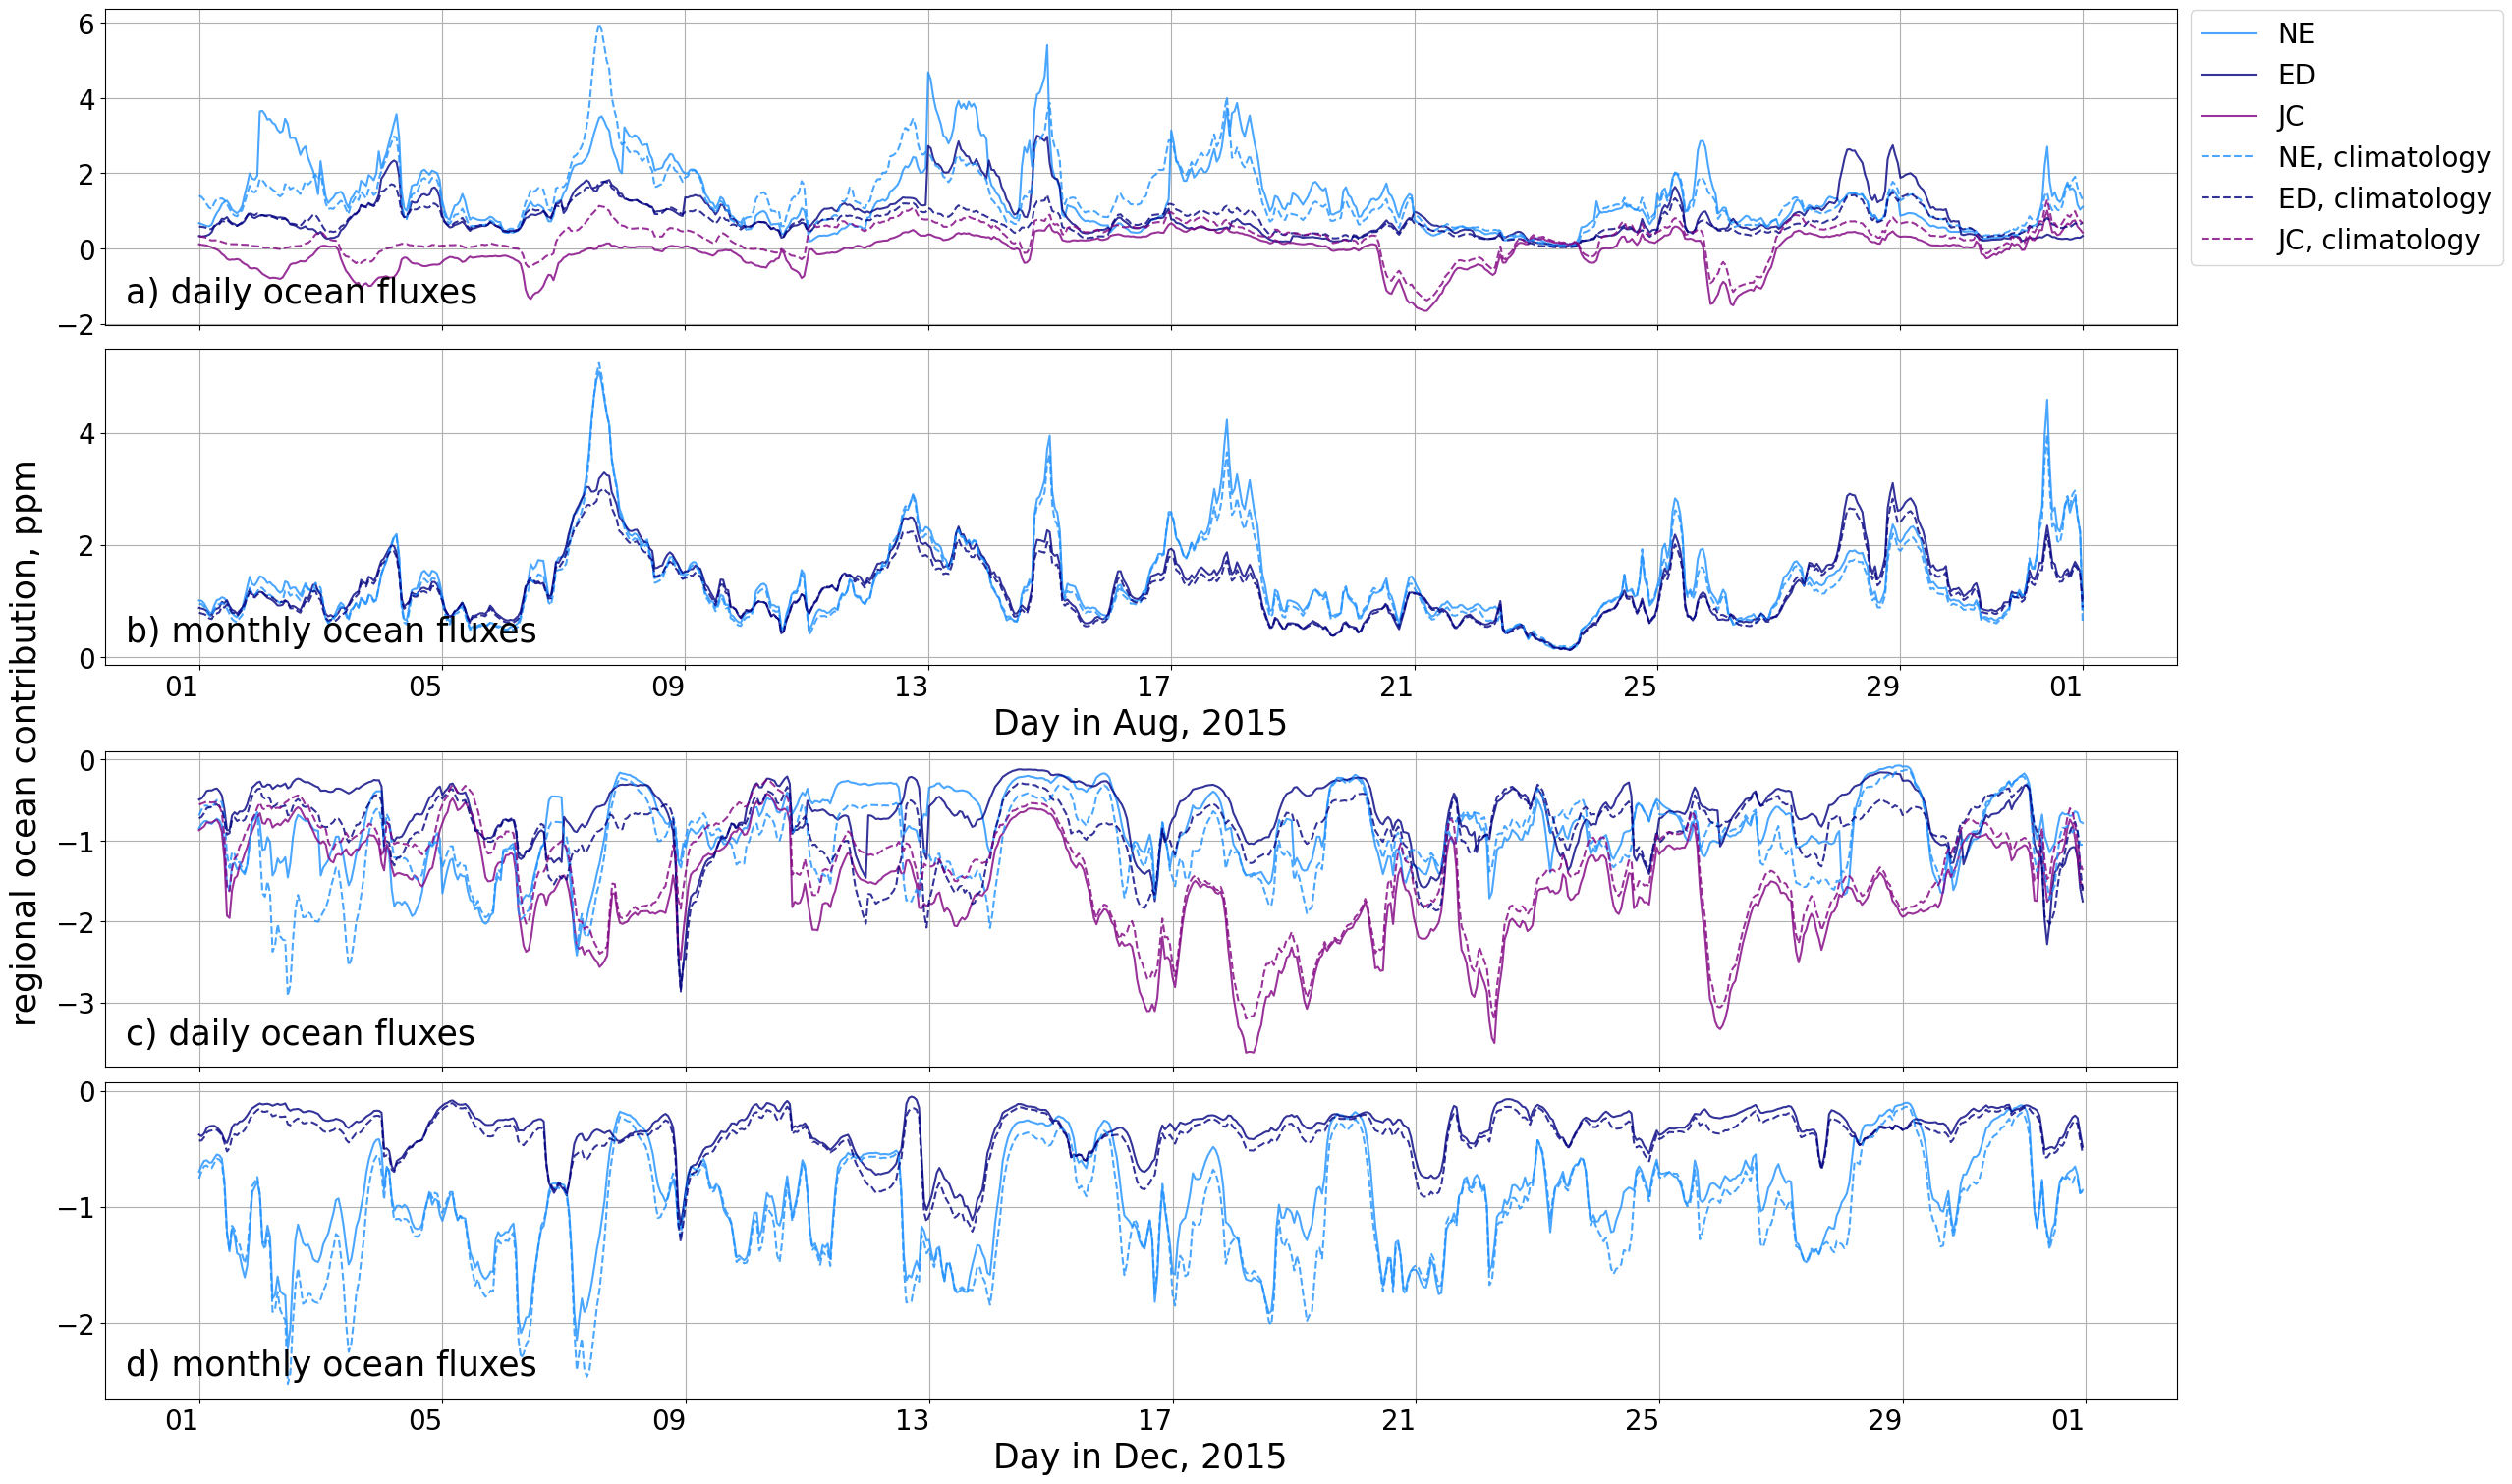

In [56]:
fig, axes = plt.subplots(nrows=2*len(months), ncols=1, figsize=(25, 7.5*len(months)), constrained_layout=True)

plots = [[[[ts_month[spec].plot(ax=axes[rr+2*mm], label=labels_res[data_type][spec], ls=ls[data_type],
                                color=colors['_'.join([spec.split('_')[0], spec.split('_')[2]])], alpha=0.8)
            for spec in labels_res[data_type].keys()]
           for mm, ts_month in enumerate(ts_type.values())]
          for data_type, ts_type in ts_data_all.items()]
         for rr, labels_res in enumerate(labels.values())]
            
legend = axes[0].legend(bbox_to_anchor=(1,1.04), fontsize=20)
xlab = [ax.set_xlabel('') for ax in axes]
ylab = [ax.set_ylabel('') for ax in axes]
grid = [ax.grid() for ax in axes]
ylabel = fig.text(-0.01, 0.5, 'regional ocean contribution, ppm', va='center', ha='center', rotation='vertical', fontsize=25)
# res_labels = [axes[rr].text(0.99, 0.03, f'{res} ocean fluxes', fontsize=25, va='bottom', ha='right', transform=axes[rr].transAxes)
#               for rr, res in enumerate(list(resolution.values())*2)]
panel_labels = [axes[rr].text(0.01, 0.05, f'{chr(97+rr)}) {res} ocean fluxes', va='bottom', transform=axes[rr].transAxes, fontsize=25)
                for rr, res in enumerate(list(resolution.values())*2)]

if len(months)>1:
       myFmt = mdates.DateFormatter('%d')
       [ax.xaxis.set_major_formatter(myFmt) for ax in axes]
       ticks = [ax.tick_params(labelsize=20, labelrotation=0) for ax in axes]
       xlabel = [axes[mm*2+1].set_xlabel(f'Day in {apo_plot_info.month_names[month]}, {year}', fontsize=25)
                 for mm, month in enumerate(months)]
else:
       ticks = [ax.tick_params(labelsize=20) for ax in axes]
[axes[ii].xaxis.set_ticklabels([]) for ii in [i for i in range(0, len(axes))[0%2::2]]]

date_str = '-'.join([f'{year}{str(month).zfill(2)}'for month in months])
spec_str = 'all' if len(species)==3 else '-'.join(species)
filename = os.path.join('/user', 'work', 'vf20487', 'Figures', 'Timeseries', 'Ocean',
                        f'{site}_{spec_str.upper()}_ocean_timeseries_{date_str}.png')
print(f'Saving to {filename}')
fig.savefig(filename, bbox_inches='tight', pad_inches=0.4)

## Model APO

Above we have investigated the effects of climatologies vs year-specific fluxes on the mf of a gas species. \
Now we look at how it affects our APO model.

### Import the APO components timeseries data

## Model the ocean component of the APO

We model the ocean species components of APO, and then combine these to give an ocean APO model for the climatologies and year-specific fluxes.

In [37]:
ts_data_all['climatology'][8]

<xarray.Dataset>
Dimensions:             (time: 745)
Coordinates:
  * time                (time) datetime64[ns] 2015-08-01 ... 2015-09-01
Data variables:
    co2_ocean_nemo_mth  (time) float32 -0.2643 -0.2546 ... -0.8007 -0.7611
    co2_ocean_ecco_day  (time) float32 0.1491 0.1462 0.1314 ... 0.2887 0.2199
    o2_ocean_ecco_day   (time) float64 0.5857 0.5764 0.5667 ... 0.6496 0.6881
    co2_ocean_jena_day  (time) float64 -0.000732 -0.0006512 ... -0.003087
    o2_ocean_jena_day   (time) float64 0.3253 0.3142 0.3038 ... 0.7394 0.6706
    o2_ocean_nemo_day   (time) float32 1.405 1.372 1.291 ... 1.623 1.441 1.303
    n2_ocean_nemo_day   (time) float32 0.5344 0.5263 0.5053 ... 0.2361 0.2845
    co2_ocean_ecco_mth  (time) float32 1.075 1.048 0.899 ... 3.385 2.717 3.522
    o2_ocean_ecco_mth   (time) float64 0.7893 0.7778 0.7649 ... 1.476 0.8855
    o2_ocean_nemo_mth   (time) float32 0.9485 0.943 0.8946 ... 2.227 0.5937
    n2_ocean_nemo_mth   (time) float32 0.2506 0.2496 0.2483 ... 0.6135 -0.1328

In [38]:
apo_species = {d_type: {month: {res: apo_emiss_func.apo_species_split(ocean_co2 = ts_month.co2_ocean_nemo_mth,
                                                                      ocean_n2 = ts_month.n2_ocean_nemo_day,
                                                                      ocean_o2 = ts_month[f'o2_ocean_nemo_{res}'])
                                for res in ['day', 'mth']}
                        for month, ts_month in ts_type.items()}
               for d_type, ts_type in ts_data_all.items()}

for d_type, ts_type in ts_data_all.items():
    for month, ts_month in ts_type.items():
        for res in ['day', 'mth']:
            for spec in ['o2', 'co2']:
                res_sim = res if spec=='o2' else 'mth'
                apo_species[d_type][month][res] = {f'{spec}_ocean_nemo_{res_sim}' if k==f'{spec}_ocean' else k:v for k,v in apo_species[d_type][month][res].items()}
                for sim in ['jena', 'ecco']:
                    res_sim = res if spec=='o2' else 'day'
                    if f'{spec}_ocean_{sim}_{res_sim}' in ts_month.data_vars:
                        apo_species[d_type][month][res][f'{spec}_ocean_{sim}_{res_sim}'] = apo_emiss_func.apo_species_split(**{f'ocean_{spec}': ts_month[f'{spec}_ocean_{sim}_{res_sim}']})[f'{spec}_ocean']

co2_res = {'ecco': 'day', 'jena': 'day', 'nemo': 'mth'}
apo_split = {d_type: {month: {res: {ocean_sim: apo_res[f'co2_ocean_{ocean_sim.split("_")[2]}_{co2_res[ocean_sim.split("_")[2]]}'] + apo_o2 + apo_res['n2_ocean']
                                    for ocean_sim, apo_o2 in apo_res.items() if ocean_sim[:8]=='o2_ocean'}
                              for res, apo_res in apo_month.items()}
                    for month, apo_month in apo_type.items()}
             for d_type, apo_type in apo_species.items()}

## Plot the APO models

Saving to /user/work/vf20487/Figures/Timeseries/Ocean/WAO_APO_ocean_timeseries_201508-201512.png


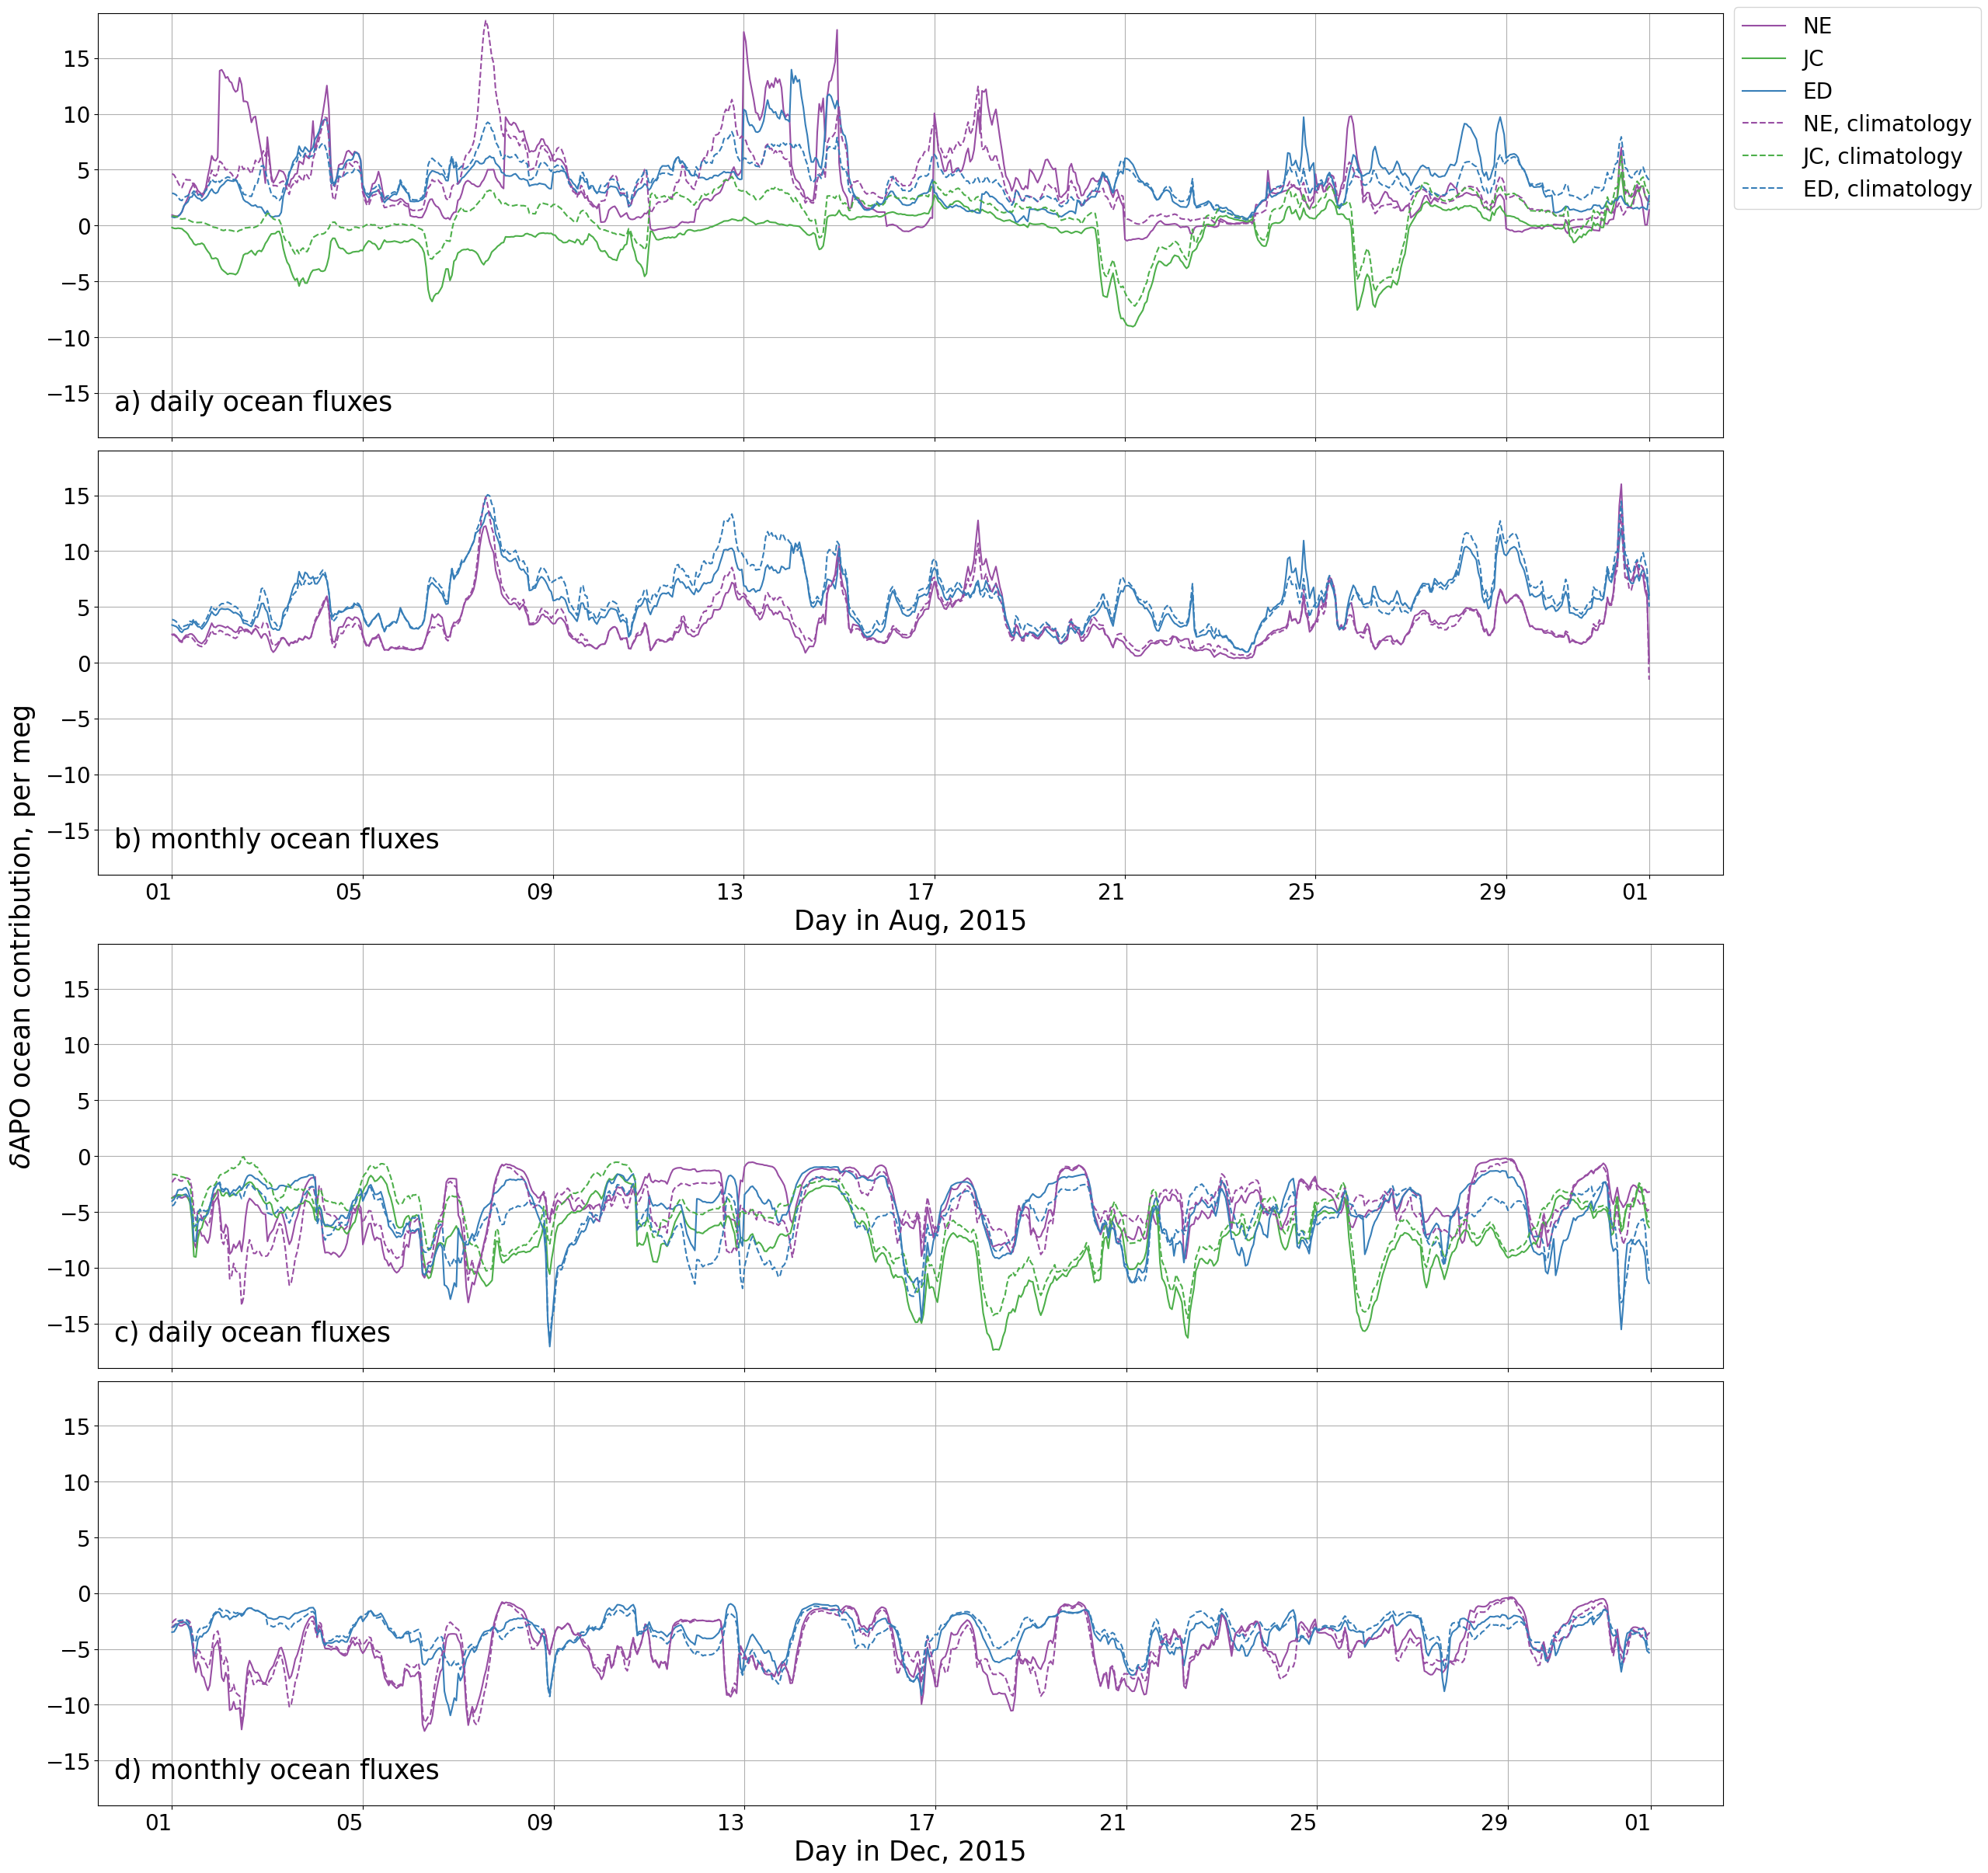

In [40]:
fig, axes = plt.subplots(nrows=2*len(months), ncols=1, figsize=(25, 12*len(months)), constrained_layout=True)

plots = [[[[apo_sim.plot(ax=axes[rr+2*mm], label=labels[res][data_type][ocean_sim], ls=ls[data_type],
                         color=apo_plot_info.colors[ocean_sim.split('_')[2]])#, alpha=0.8)
            for ocean_sim, apo_sim in apo_res.items()]
           for rr, (res, apo_res) in enumerate(apo_month.items())]
          for mm, (month, apo_month) in enumerate(apo_type.items())]
         for data_type, apo_type in apo_split.items()]

if len(months)>1:
       myFmt = mdates.DateFormatter('%d')
       [ax.xaxis.set_major_formatter(myFmt) for ax in axes]
       ticks = [ax.tick_params(labelsize=20, labelrotation=0) for ax in axes]
       xlabel = [ax.set_xlabel('') for ax in axes]
       xlabel = [axes[mm*2+1].set_xlabel(f'Day in {apo_plot_info.month_names[month]}, {year}', fontsize=25)
                 for mm, month in enumerate(months)]
else:
       ticks = [ax.tick_params(labelsize=20) for ax in axes]
[axes[ii].xaxis.set_ticklabels([]) for ii in [i for i in range(0, len(axes))[0%2::2]]]
            
legend = axes[0].legend(bbox_to_anchor=(1,1.04), fontsize=20)
ylab = [ax.set_ylabel('') for ax in axes]
grid = [ax.grid() for ax in axes]
[axes[ii].xaxis.set_ticklabels([]) for ii in [i for i in range(0, len(axes))[0%2::2]]]
ylabel = fig.text(-0.01, 0.5, r'$\delta$APO ocean contribution, per meg', va='center', ha='center', rotation='vertical', fontsize=25)
ylims = [ax.set_ylim(-19, 19) for ax in axes]
panel_labels = [axes[rr].text(0.01, 0.05, f'{chr(97+rr)}) {res} ocean fluxes', va='bottom', transform=axes[rr].transAxes, fontsize=25)
                for rr, res in enumerate(list(resolution.values())*2)]

date_str = '-'.join([f'{year}{str(month).zfill(2)}'for month in months])
spec_str = 'all' if len(species)==3 else '-'.join(species)
filename = os.path.join('/user', 'work', 'vf20487', 'Figures', 'Timeseries', 'Ocean',
                        f'{site}_APO_ocean_timeseries_{date_str}.png')
print(f'Saving to {filename}')
fig.savefig(filename, bbox_inches='tight', pad_inches=0.4)